## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [97]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [98]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot X vs. y

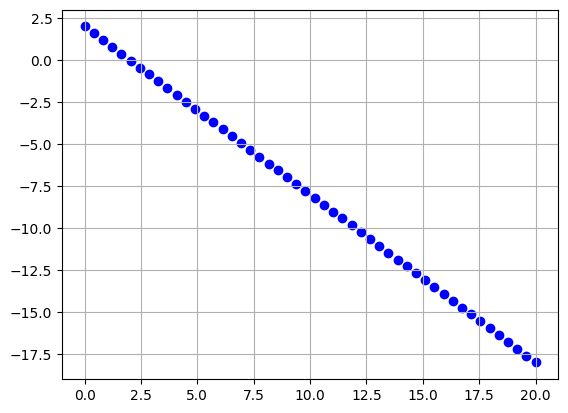

In [5]:
plt.scatter(X , y , color = 'b')
plt.grid()
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.

In [71]:
def adagrad_GD_single_var(X , y , alpha ,epsilon , max_iterations):

  theta_0 =0
  theta_1 = 0
  no_of_iterations = 0
  vt_0 = [0]
  vt_1 = [0]
  theta_0_lst =[]
  theta_1_lst = []
  iteration_loss = []
  hypothesis_out =[]
  error_vector =[]


  for i in range (max_iterations):
    print (f'------------------------- Iteration  {i} -------------------------')
    print()

    y_pred =  theta_0 + theta_1 * X
    hypothesis_out.append(y_pred)
    print('h(x) : ' , y_pred )
    print()

    error = y_pred - y
    error_vector.append(error)
    print("Error Vector : " , error)
    print()

    j = (1 / (2 * X.shape[0]) ) *(np.linalg.norm(error) ** 2)
    iteration_loss.append(j)
    print('j = ' , j)
    print()

    d_theta_0 =  (error).sum() / ( X.shape[0] )
    d_theta_1 =  (error @ X).sum() / ( X.shape[0] )
    gradiant_vector = np.array([[d_theta_0] , [d_theta_1]])
    print()

    print('Gradiant Vector  = ', gradiant_vector )
    print()
    gradiant_vector_norm = np.linalg.norm(gradiant_vector )
    print('Gradiant Vector Norm = ', gradiant_vector_norm)
    print()
    vt_0.append(vt_0[-1] + (d_theta_0 ** 2 ))
    print('v_0 = ' , vt_0[-1] )
    vt_1.append(vt_1[-1] + (d_theta_1 ** 2 ))
    print('v_1 = ' , vt_1[-1] )

    if gradiant_vector_norm <= 0.001 or (len(iteration_loss) > 1 and abs(iteration_loss[-1] - iteration_loss[-2]) <= 0.001):

        #del iteration_loss[-1]
        del hypothesis_out[-1]
        del error_vector[-1]
        #no_of_iterations = i

        print(f'---------- gradiant descent covered after {i + 1} iterartions -----------')
        print ('theta_0_opt' , theta_0)
        print ('theta_1_opt' , theta_1)
        print("Error Vector : " , error_vector[-1])
        print()

        print('cost : ' , iteration_loss[-1])
        print()

        print('h(x) : ' , hypothesis_out[-1] )
        print('y_actual : ' , y)
        print()

        return theta_0_lst , theta_1_lst , iteration_loss[1:] , hypothesis_out , theta_0 , theta_1 , no_of_iterations
        break

    theta_0 = theta_0 - (alpha  / (np.sqrt(vt_0[-1]) + epsilon )) * d_theta_0
    theta_0_lst.append(theta_0)
    print('theta_0_new : ' , theta_0)
    print()
    theta_1 = theta_1 - (alpha  / (np.sqrt(vt_1[-1]) + epsilon )) * d_theta_1
    theta_1_lst.append(theta_1)
    print('theta_1_new : ' , theta_1)
    no_of_iterations += 1
  return theta_0_lst , theta_1_lst , iteration_loss , hypothesis_out , theta_0 , theta_1 , no_of_iterations


In [61]:
theta_0_lst , theta_1_lst , iteration_loss , hypothesis_out , theta_0 , theta_1 , no_of_iterations = adagrad_GD_single_var(X , y , 0.05 ,1e-08 , 500)

Streaming output truncated to the last 5000 lines.
Gradiant Vector Norm =  13.483862212792923

v_0 =  1116.3011096095656
v_1 =  278651.6503221095
theta_0_new :  -0.6367565829308789

theta_1_new :  -0.7054744093410021
------------------------- Iteration  129 -------------------------

h(x) :  [ -0.63675658  -0.92470532  -1.21265406  -1.5006028   -1.78855154
  -2.07650028  -2.36444901  -2.65239775  -2.94034649  -3.22829523
  -3.51624397  -3.80419271  -4.09214145  -4.38009018  -4.66803892
  -4.95598766  -5.2439364   -5.53188514  -5.81983388  -6.10778261
  -6.39573135  -6.68368009  -6.97162883  -7.25957757  -7.54752631
  -7.83547505  -8.12342378  -8.41137252  -8.69932126  -8.98727
  -9.27521874  -9.56316748  -9.85111622 -10.13906495 -10.42701369
 -10.71496243 -11.00291117 -11.29085991 -11.57880865 -11.86675738
 -12.15470612 -12.44265486 -12.7306036  -13.01855234 -13.30650108
 -13.59444982 -13.88239855 -14.17034729 -14.45829603 -14.74624477]

Error Vector :  [-2.63675658 -2.51654206 -2.3963

In [11]:
from sklearn.metrics import r2_score

In [12]:
y_pred = theta_0 + theta_1 * X

In [13]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  0.9484638125790851


In [14]:
def loss_epochs(epochs , loss):
  plt.plot(epochs , loss)
  plt.scatter(epochs , loss)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.grid()
  plt.show()

In [41]:
no_of_iterations = np.arange(no_of_iterations )

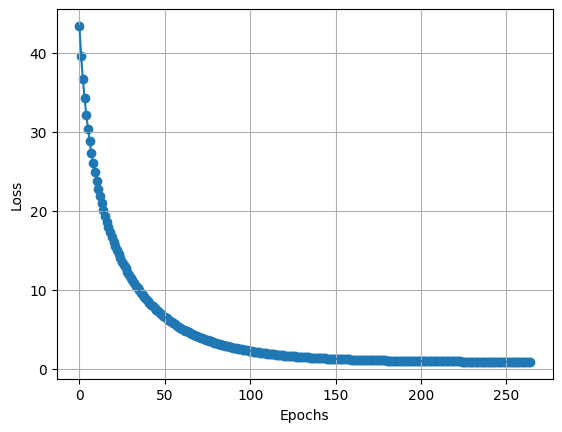

In [42]:
loss_epochs(no_of_iterations , iteration_loss)

In [43]:
def theta_loss(theta_0 , theta_1 , loss):
    plt.figure(figsize =(8, 9))
    plt.suptitle('Learning Rate = 0.0005 ', fontsize=10)
    plt.subplot(2,1 ,1)
    plt.plot(theta_0 , loss)
    plt.scatter(theta_0 , loss)
    plt.xlabel('Theta_0')
    plt.ylabel('Loss')
    plt.grid()

    plt.subplot(2,1 ,2)
    plt.plot(theta_1 , loss)
    plt.scatter(theta_1 , loss)
    plt.xlabel('Theta_1')
    plt.ylabel('Loss')
    plt.grid()

    plt.show()

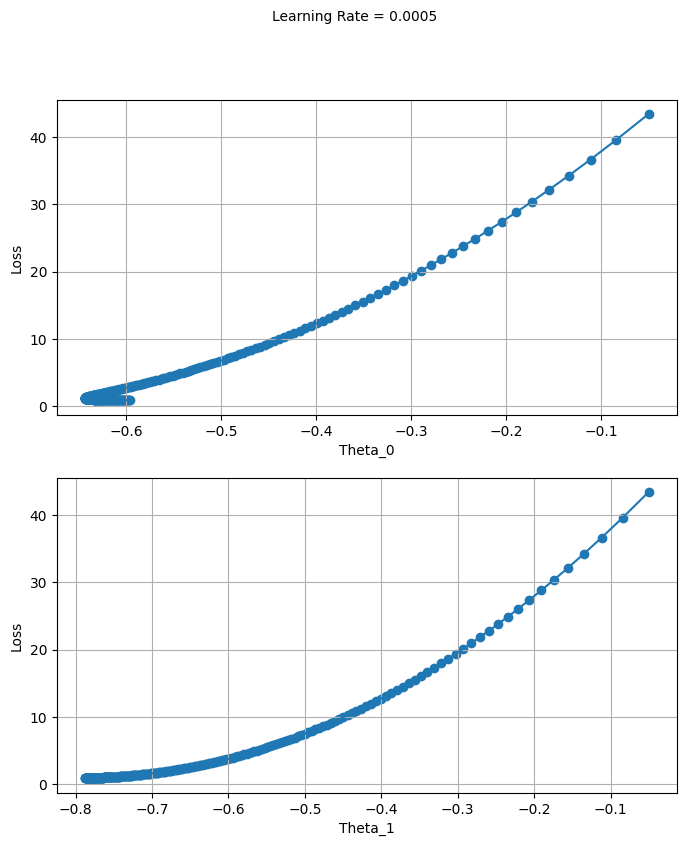

In [44]:
theta_loss(theta_0_lst , theta_1_lst , iteration_loss)

In [45]:
def regression_lines(X , y , y_pred_list):
  y_pred_arr = np.array(y_pred_list)
  plt.scatter(X , y)
  plt.plot(X,y_pred_arr.T,c='r')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.grid()
  plt.show()

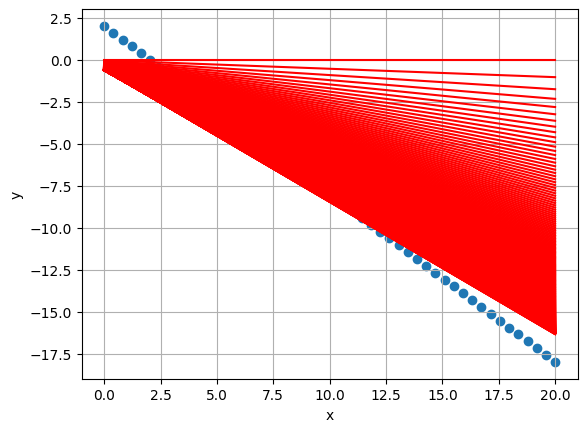

In [46]:
regression_lines(X , y , hypothesis_out)

In [47]:
def best_regression_lines(X , y , y_pred):
  plt.scatter(X , y)
  plt.plot(X,y_pred,c='r')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.grid()
  plt.show()

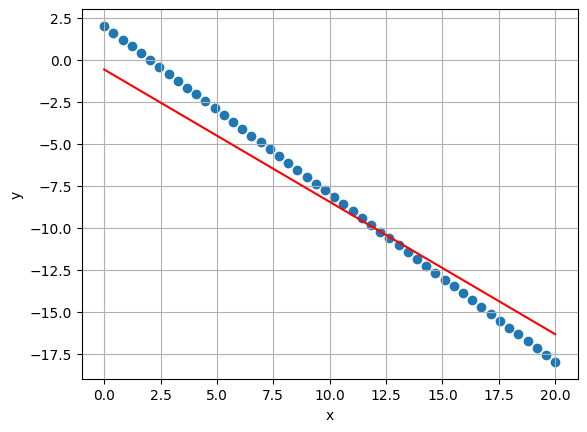

In [48]:
best_regression_lines(X , y , y_pred)

##### The following results uses alpha = 0.005, epsilon =  1e-08, and max. iterations = 5000.

In [72]:
theta_0_lst , theta_1_lst , iteration_loss , hypothesis_out , theta_0 , theta_1 , no_of_iterations = adagrad_GD_single_var(X , y , 0.005 ,1e-08 , 5000)

Streaming output truncated to the last 5000 lines.

Error Vector :  [-2.53545188e+00 -2.35425469e+00 -2.17305749e+00 -1.99186030e+00
 -1.81066310e+00 -1.62946591e+00 -1.44826871e+00 -1.26707152e+00
 -1.08587432e+00 -9.04677129e-01 -7.23479934e-01 -5.42282739e-01
 -3.61085544e-01 -1.79888349e-01  1.30884620e-03  1.82506041e-01
  3.63703236e-01  5.44900431e-01  7.26097627e-01  9.07294822e-01
  1.08849202e+00  1.26968921e+00  1.45088641e+00  1.63208360e+00
  1.81328080e+00  1.99447799e+00  2.17567519e+00  2.35687238e+00
  2.53806958e+00  2.71926677e+00  2.90046397e+00  3.08166116e+00
  3.26285836e+00  3.44405555e+00  3.62525275e+00  3.80644994e+00
  3.98764714e+00  4.16884433e+00  4.35004153e+00  4.53123872e+00
  4.71243592e+00  4.89363311e+00  5.07483031e+00  5.25602750e+00
  5.43722470e+00  5.61842189e+00  5.79961909e+00  5.98081628e+00
  6.16201348e+00  6.34321067e+00]

j =  5.231054472165134


Gradiant Vector  =  [[ 1.90387939]
 [34.44055553]]

Gradiant Vector Norm =  34.4931387644978

In [73]:
y_pred = theta_0 + theta_1 * X

In [74]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  0.7096780137749918


In [77]:
no_of_iterations = np.arange(no_of_iterations)

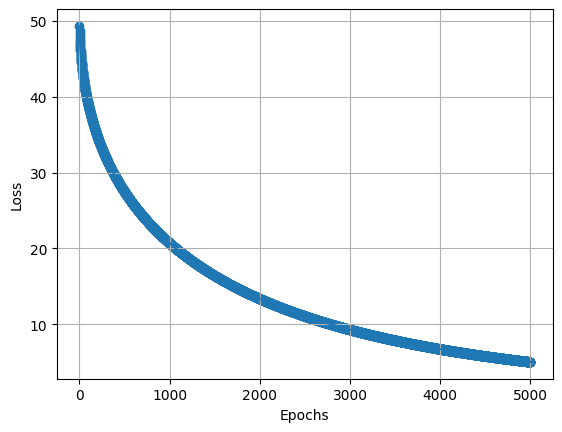

In [78]:
loss_epochs(no_of_iterations , iteration_loss)

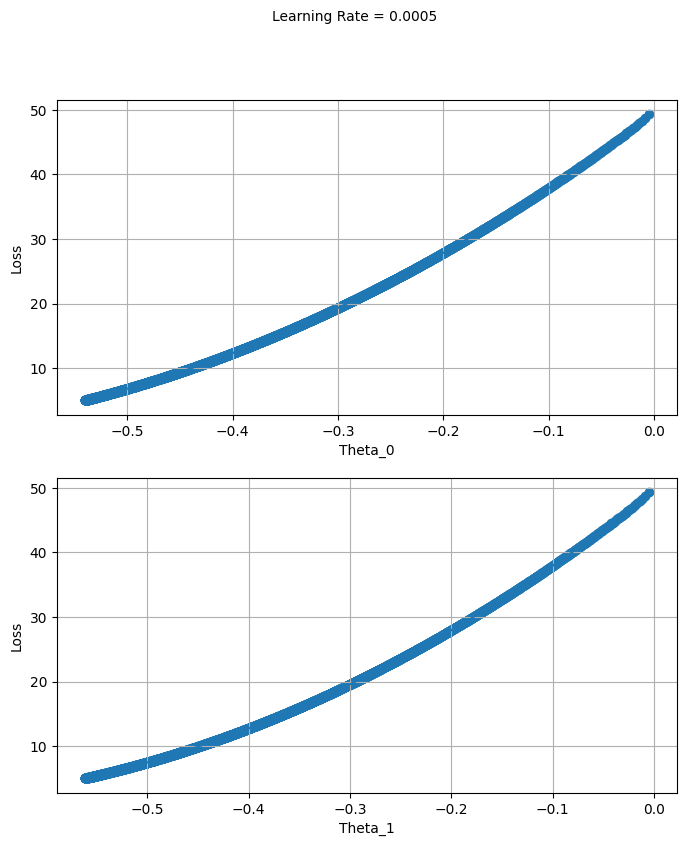

In [79]:
theta_loss(theta_0_lst , theta_1_lst , iteration_loss)

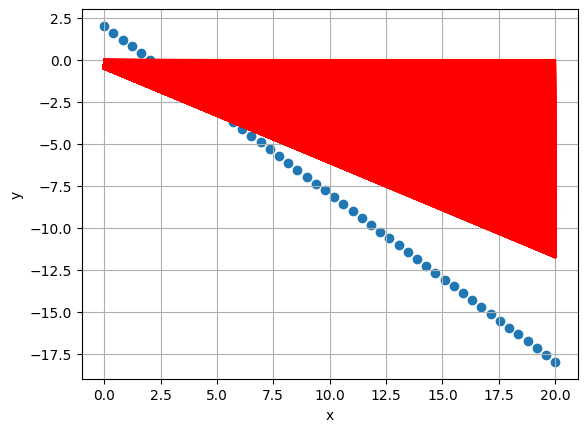

In [80]:
regression_lines(X , y , hypothesis_out)

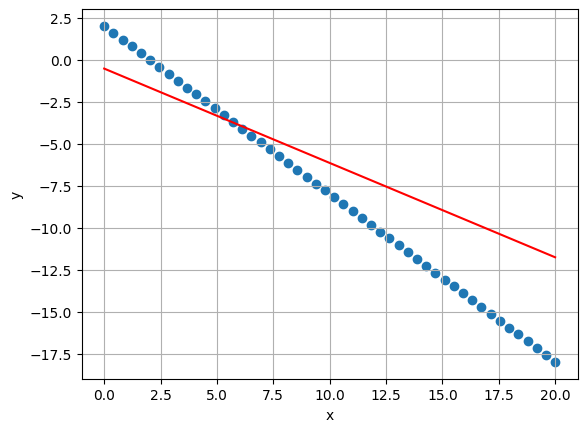

In [81]:
best_regression_lines(X , y , y_pred)

##### The following results uses alpha = 0.0005, epsilon =  1e-08, and max. iterations = 5000.

In [82]:
theta_0_lst , theta_1_lst , iteration_loss , hypothesis_out , theta_0 , theta_1 , no_of_iterations = adagrad_GD_single_var(X , y , 0.0005 ,1e-08 , 5000)

Streaming output truncated to the last 5000 lines.
h(x) :  [-0.05303115 -0.07470073 -0.0963703  -0.11803987 -0.13970945 -0.16137902
 -0.1830486  -0.20471817 -0.22638774 -0.24805732 -0.26972689 -0.29139647
 -0.31306604 -0.33473561 -0.35640519 -0.37807476 -0.39974434 -0.42141391
 -0.44308348 -0.46475306 -0.48642263 -0.50809221 -0.52976178 -0.55143135
 -0.57310093 -0.5947705  -0.61644008 -0.63810965 -0.65977922 -0.6814488
 -0.70311837 -0.72478795 -0.74645752 -0.76812709 -0.78979667 -0.81146624
 -0.83313582 -0.85480539 -0.87647496 -0.89814454 -0.91981411 -0.94148369
 -0.96315326 -0.98482283 -1.00649241 -1.02816198 -1.04983156 -1.07150113
 -1.0931707  -1.11484028]

Error Vector :  [-2.05303115 -1.66653746 -1.28004377 -0.89355008 -0.50705639 -0.1205627
  0.265931    0.65242469  1.03891838  1.42541207  1.81190576  2.19839945
  2.58489314  2.97138683  3.35788053  3.74437422  4.13086791  4.5173616
  4.90385529  5.29034898  5.67684267  6.06333637  6.44983006  6.83632375
  7.22281744  7.60931113 

In [83]:
y_pred = theta_0 + theta_1 * X

In [84]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  -1.4736441832884104


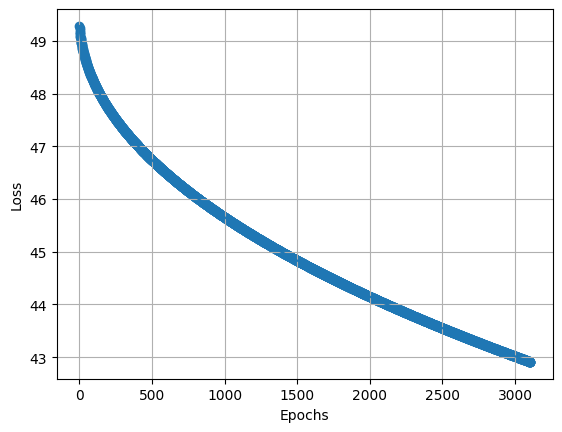

In [87]:
loss_epochs(no_of_iterations , iteration_loss)

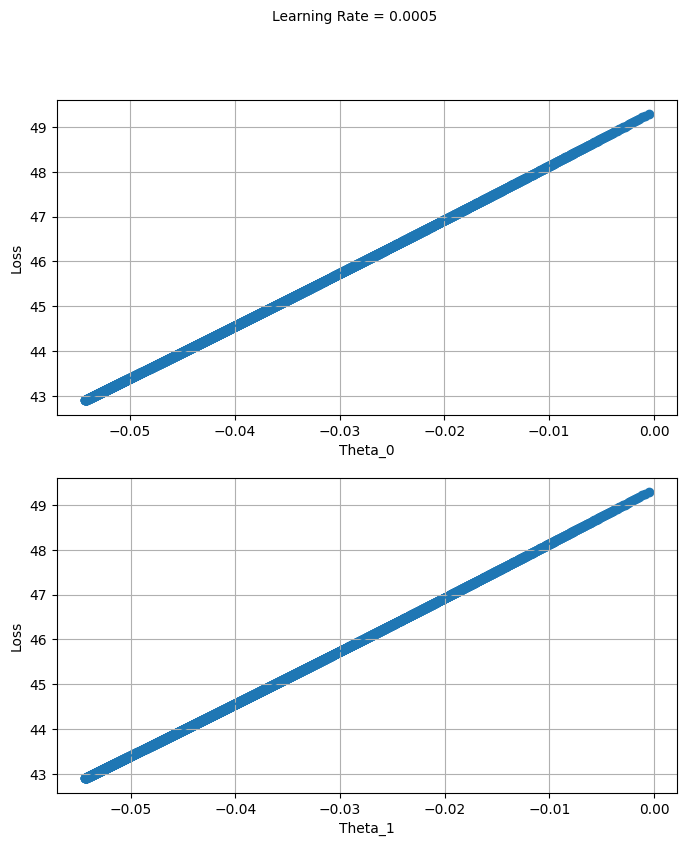

In [88]:
theta_loss(theta_0_lst , theta_1_lst , iteration_loss)

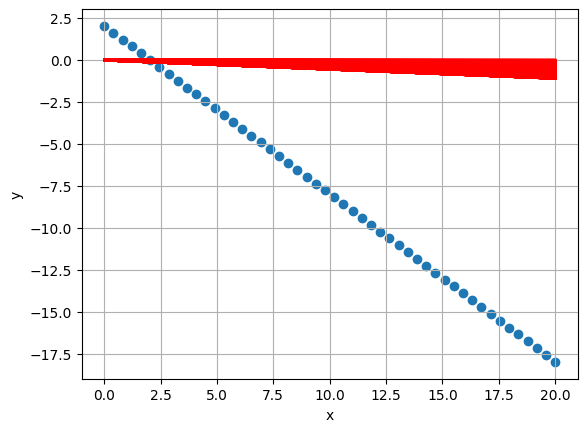

In [89]:
regression_lines(X , y , hypothesis_out)

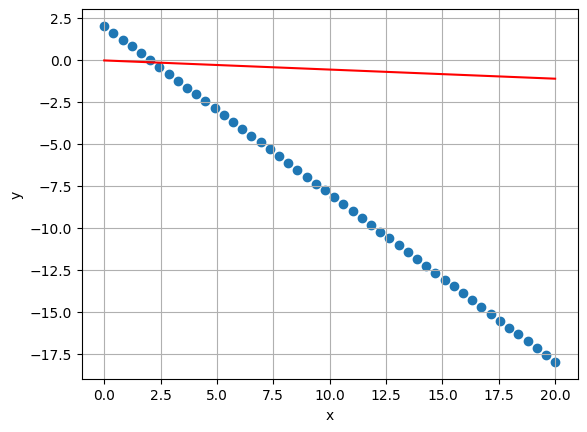

In [90]:
best_regression_lines(X,y,y_pred)

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

In [103]:
def rmsprop_GD_single_var(X , y , alpha , beta ,epsilon , max_iterations):

  theta_0 =0
  theta_1 = 0
  no_of_iterations = 0
  vt_0 = [0]
  vt_1 = [0]
  theta_0_lst =[]
  theta_1_lst = []
  iteration_loss = []
  hypothesis_out =[]
  error_vector =[]


  for i in range (max_iterations):
    print (f'------------------------- Iteration  {i} -------------------------')
    print()

    y_pred =  theta_0 + theta_1 * X
    hypothesis_out.append(y_pred)
    print('h(x) : ' , y_pred )
    print()

    error = y_pred - y
    error_vector.append(error)
    print("Error Vector : " , error)
    print()

    j = (1 / (2 * X.shape[0])) * np.sum(error**2)
    iteration_loss.append(j)
    print('j = ' , j)
    print()

    d_theta_0 =  (error).sum() / ( X.shape[0] )
    d_theta_1 =  (error @ X).sum() / ( X.shape[0] )
    gradiant_vector = np.array([[d_theta_0] , [d_theta_1]])
    print()

    print('Gradiant Vector  = ', gradiant_vector )
    print()
    gradiant_vector_norm = np.linalg.norm(gradiant_vector )
    print('Gradiant Vector Norm = ', gradiant_vector_norm)
    print()
    vt_0.append((beta * vt_0[-1]) + ((1 - beta) * (d_theta_0 ** 2 )))
    print('v_0 = ' , vt_0[-1] )
    vt_1.append((beta * vt_1[-1]) + ((1 - beta) * (d_theta_1 ** 2 )))
    print('v_1 = ' , vt_1[-1] )

    if gradiant_vector_norm <= 0.001 or (len(iteration_loss) > 1 and abs(iteration_loss[-1] - iteration_loss[-2]) <= 0.001):

        #del iteration_loss[-1]
        del hypothesis_out[-1]
        del error_vector[-1]
        #no_of_iterations = i

        print(f'---------- gradiant descent covered after {i + 1} iterartions -----------')
        print ('theta_0_opt' , theta_0)
        print ('theta_1_opt' , theta_1)
        print("Error Vector : " , error_vector[-1])
        print()

        print('cost : ' , iteration_loss[-1])
        print()

        print('h(x) : ' , hypothesis_out[-1] )
        print('y_actual : ' , y)
        print()

        return theta_0_lst , theta_1_lst , iteration_loss[1:] , hypothesis_out , theta_0 , theta_1 , no_of_iterations
        break

    update_0 = (alpha / (np.sqrt(vt_0[-1]) + epsilon)) * d_theta_0
    theta_0 = theta_0 - update_0
    #theta_0 = theta_0 - (alpha  / (np.sqrt(vt_0[-1]) + epsilon )) * d_theta_0
    theta_0_lst.append(theta_0)
    print('theta_0_new : ' , theta_0)
    print()
    update_1 = (alpha / (np.sqrt(vt_1[-1]) + epsilon)) * d_theta_1
    theta_1 = theta_1 - update_1
    #theta_1 = theta_1 - (alpha  / (np.sqrt(vt_1[-1]) + epsilon )) * d_theta_1
    theta_1_lst.append(theta_1)
    print('theta_1_new : ' , theta_1)
    no_of_iterations += 1
  return theta_0_lst , theta_1_lst , iteration_loss , hypothesis_out , theta_0 , theta_1 , no_of_iterations


##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

In [104]:
theta_0_lst , theta_1_lst , iteration_loss , hypothesis_out , theta_0 , theta_1 , no_of_iterations = rmsprop_GD_single_var(X , y , 0.05 , 0.9 ,1e-08 , 500)

------------------------- Iteration  0 -------------------------

h(x) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector :  [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021


Gradiant Vector  =  [[  8.        ]
 [114.69387755]]

Gradiant Vector Norm =  114.97254258164628

v_0 =  6.3999999999999

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0_0 : 6.399999999999999
v_1_0 : 1315.4685547

Error Vector:
[-1.37234243 -1.33021683 -1.28809123 -1.24596564 -1.20384004 -1.16171444
 -1.11958884 -1.07746324 -1.03533764 -0.99321204 -0.95108644 -0.90896084
 -0.86683524 -0.82470964 -0.78258404 -0.74045844 -0.69833284 -0.65620724
 -0.61408164 -0.57195604 -0.52983044 -0.48770484 -0.44557924 -0.40345364
 -0.36132804 -0.31920244 -0.27707684 -0.23495124 -0.19282564 -0.15070004
 -0.10857444 -0.06644884 -0.02432324  0.01780236  0.05992796  0.10205355
  0.14417915  0.18630475  0.22843035  0.27055595  0.31268155  0.35480715
  0.39693275  0.43905835  0.48118395  0.52330955  0.56543515  0.60756075
  0.64968635  0.69181195]

j = 0.24266691762557144

Gradient Vector:
[[-0.34026524]
 [ 0.17802355]]

Gradient Vector Norm:
0.38402190104283834

v_0_61 : 0.20840318326258994
v_1_61 : 9.832812036196241

theta_0_61 : 0.664925507759157
theta_1_61 : -0.8996309095557083

****************** Iteration 62 ********************

h(x):
[  0.66492551   0.29772922  -0.06946707  -0.43666336  -0.80385965
  -1.17105

In [106]:
y_pred = theta_0 + theta_1 * X

In [107]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  0.9993602095484933


In [108]:
no_of_iterations = np.arange(no_of_iterations)

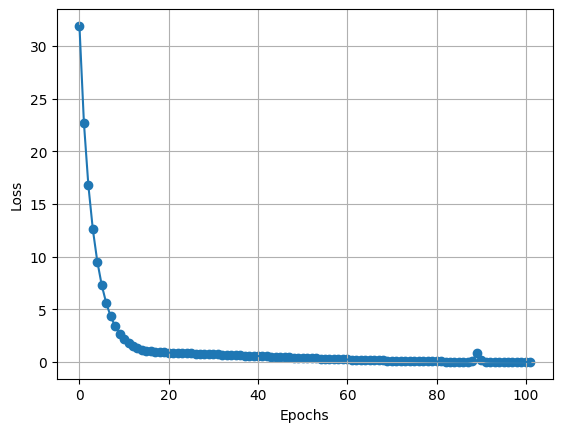

In [109]:
loss_epochs(no_of_iterations , iteration_loss)

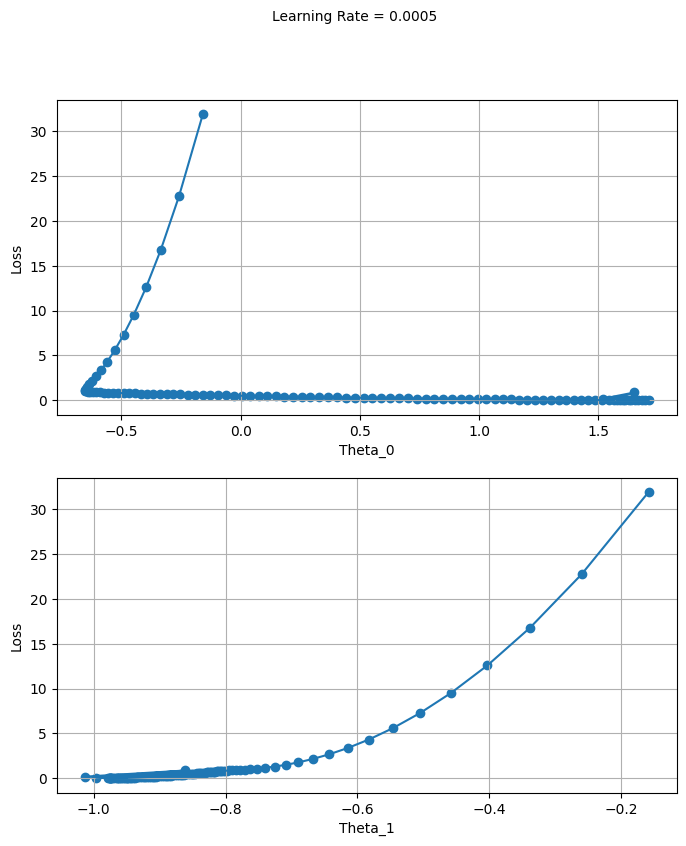

In [110]:
theta_loss(theta_0_lst , theta_1_lst , iteration_loss)

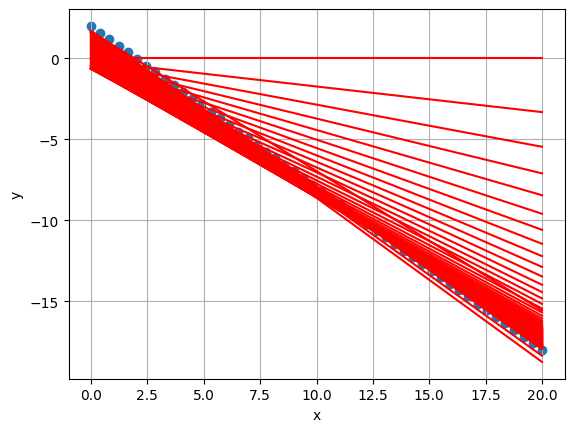

In [111]:
regression_lines(X , y , hypothesis_out)

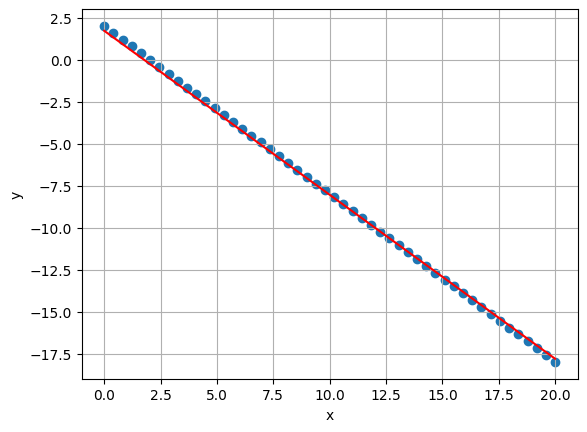

In [112]:
best_regression_lines(X,y,y_pred)

In [113]:
theta_0_lst , theta_1_lst , iteration_loss , hypothesis_out , theta_0 , theta_1 , no_of_iterations = rmsprop_GD_single_var(X , y , 0.005 , 0.9 ,1e-08 , 5000)

Streaming output truncated to the last 5000 lines.
  -3.09692091  -3.45936488  -3.82180885  -4.18425282  -4.5466968
  -4.90914077  -5.27158474  -5.63402872  -5.99647269  -6.35891666
  -6.72136064  -7.08380461  -7.44624858  -7.80869255  -8.17113653
  -8.5335805   -8.89602447  -9.25846845  -9.62091242  -9.98335639
 -10.34580036 -10.70824434 -11.07068831 -11.43313228 -11.79557626
 -12.15802023 -12.5204642  -12.88290818 -13.24535215 -13.60779612
 -13.97024009 -14.33268407 -14.69512804 -15.05757201 -15.42001599
 -15.78245996 -16.14490393 -16.5073479  -16.86979188 -17.23223585]

Error Vector :  [-1.47248118 -1.42676188 -1.38104259 -1.3353233  -1.28960401 -1.24388471
 -1.19816542 -1.15244613 -1.10672684 -1.06100754 -1.01528825 -0.96956896
 -0.92384967 -0.87813038 -0.83241108 -0.78669179 -0.7409725  -0.69525321
 -0.64953391 -0.60381462 -0.55809533 -0.51237604 -0.46665674 -0.42093745
 -0.37521816 -0.32949887 -0.28377957 -0.23806028 -0.19234099 -0.1466217
 -0.10090241 -0.05518311 -0.00946382  0.

In [114]:
y_pred = theta_0 + theta_1 * X

In [115]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  0.9948527107478715


In [116]:
no_of_iterations = np.arange(no_of_iterations)

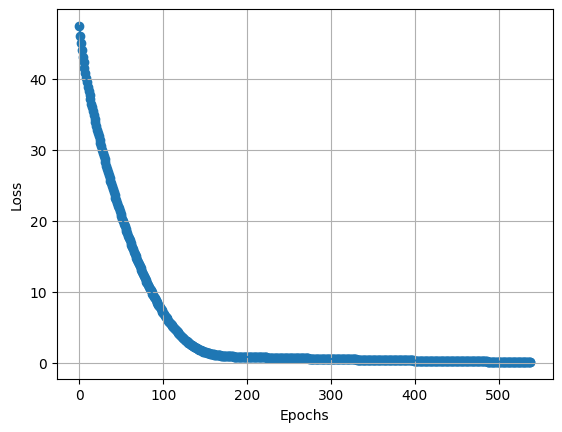

In [117]:
loss_epochs(no_of_iterations , iteration_loss)

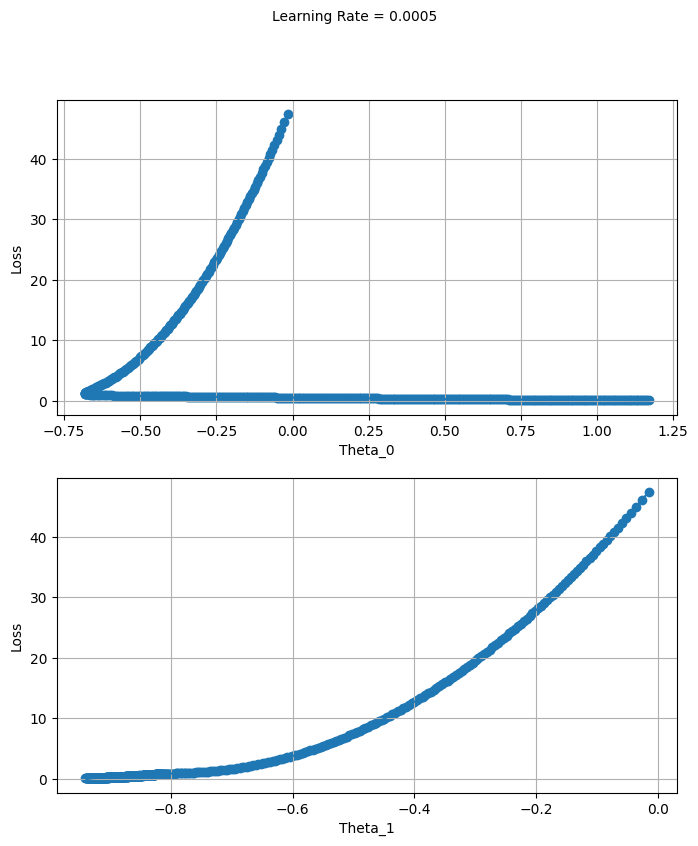

In [118]:
theta_loss(theta_0_lst , theta_1_lst , iteration_loss)

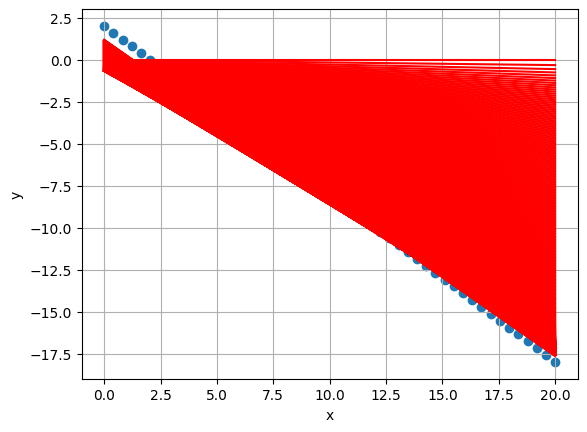

In [119]:
regression_lines(X , y , hypothesis_out)

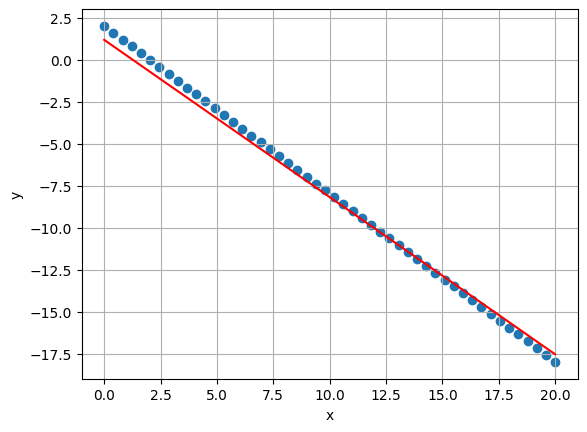

In [120]:
best_regression_lines(X,y,y_pred)

In [121]:
theta_0_lst , theta_1_lst , iteration_loss , hypothesis_out , theta_0 , theta_1 , no_of_iterations = rmsprop_GD_single_var(X , y , 0.0005 , 0.9 ,1e-08 , 5000)

Streaming output truncated to the last 5000 lines.

Gradiant Vector  =  [[-0.00953408]
 [ 9.29173663]]

Gradiant Vector Norm =  9.291741520322086

v_0 =  0.0033975813119720344
v_1 =  97.9260097691058
theta_0_new :  -0.7151393170729903

theta_1_new :  -0.7299007787233694
------------------------- Iteration  1473 -------------------------

h(x) :  [ -0.71513932  -1.013058    -1.31097669  -1.60889537  -1.90681406
  -2.20473274  -2.50265143  -2.80057011  -3.0984888   -3.39640748
  -3.69432617  -3.99224485  -4.29016354  -4.58808222  -4.88600091
  -5.18391959  -5.48183828  -5.77975697  -6.07767565  -6.37559434
  -6.67351302  -6.97143171  -7.26935039  -7.56726908  -7.86518776
  -8.16310645  -8.46102513  -8.75894382  -9.0568625   -9.35478119
  -9.65269987  -9.95061856 -10.24853724 -10.54645593 -10.84437461
 -11.1422933  -11.44021198 -11.73813067 -12.03604935 -12.33396804
 -12.63188672 -12.92980541 -13.2277241  -13.52564278 -13.82356147
 -14.12148015 -14.41939884 -14.71731752 -15.01523621 -15.3

In [122]:
y_pred = theta_0 + theta_1 * X

In [123]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  0.9476184845511563


In [124]:
no_of_iterations = np.arange(no_of_iterations)

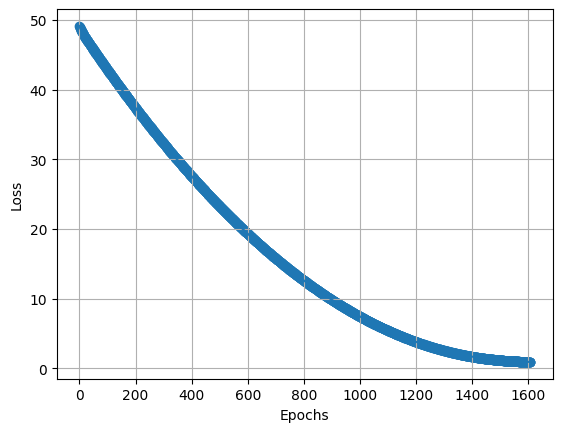

In [125]:
loss_epochs(no_of_iterations , iteration_loss)

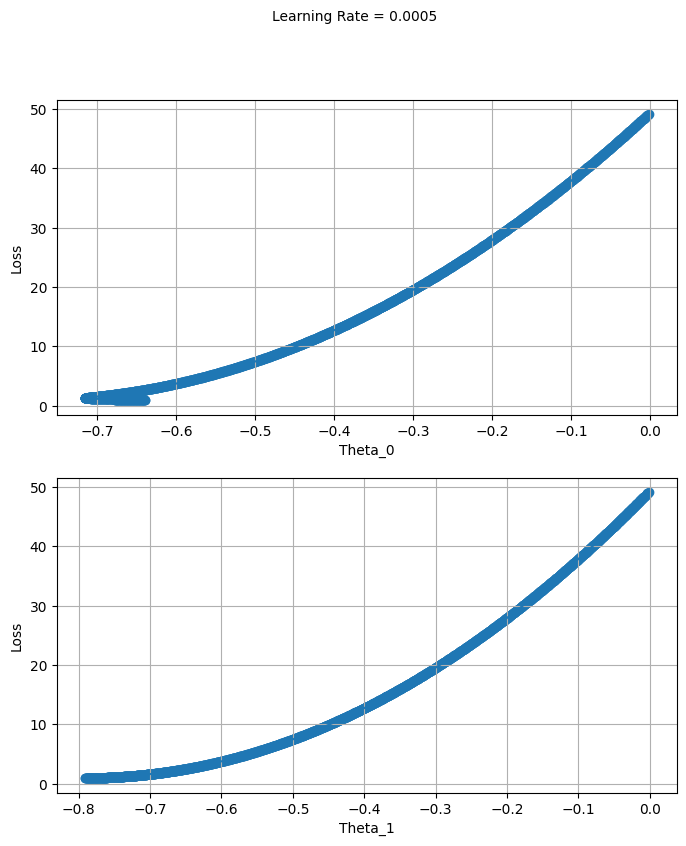

In [126]:
theta_loss(theta_0_lst , theta_1_lst , iteration_loss)

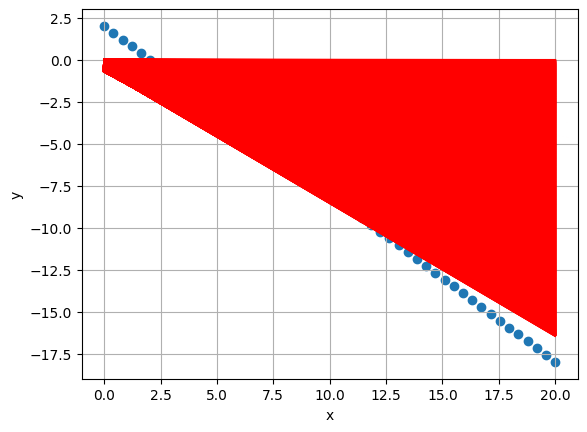

In [127]:
regression_lines(X , y , hypothesis_out)

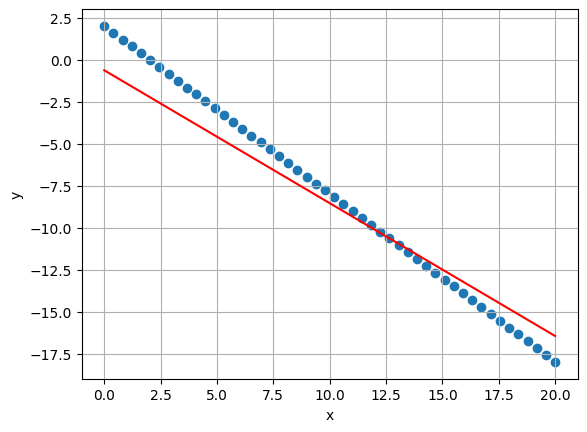

In [128]:
best_regression_lines(X,y,y_pred)

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

In [144]:
def adam_GD_single_var(X , y , alpha , beta_0 , beta_1 ,epsilon , max_iterations):

  theta_0 =0
  theta_1 = 0
  no_of_iterations = 0

  vt_0 = [0]
  vt_1 = [0]
  mt_0 = [0]
  mt_1 = [0]

  vt_c_0 = [0]
  vt_c_1 = [0]
  mt_c_0 = [0]
  mt_c_1 = [0]

  theta_0_lst =[]
  theta_1_lst = []
  iteration_loss = []
  hypothesis_out =[]
  error_vector =[]


  for i in range (max_iterations):
    print (f'------------------------- Iteration  {i} -------------------------')
    print()

    y_pred =  theta_0 + theta_1 * X
    hypothesis_out.append(y_pred)
    print('h(x) : ' , y_pred )
    print()

    error = y_pred - y
    error_vector.append(error)
    print("Error Vector : " , error)
    print()

    j = (1 / (2 * X.shape[0])) * np.sum(error**2)
    iteration_loss.append(j)
    print('j = ' , j)
    print()

    d_theta_0 =  (error).sum() / ( X.shape[0] )
    d_theta_1 =  (error @ X).sum() / ( X.shape[0] )
    gradiant_vector = np.array([[d_theta_0] , [d_theta_1]])
    print()

    print('Gradiant Vector  = ', gradiant_vector )
    print()
    gradiant_vector_norm = np.linalg.norm(gradiant_vector )
    print('Gradiant Vector Norm = ', gradiant_vector_norm)
    print()
    vt_0.append((beta_1 * vt_0[-1]) + ((1 - beta_1) * (d_theta_0 ** 2 )))
    print('v_0 = ' , vt_0[-1])
    vt_1.append((beta_1 * vt_1[-1]) + ((1 - beta_1) * (d_theta_1 ** 2 )))
    print('v_1 = ' , vt_1[-1] )
    print()
    vt_c_0.append(vt_0[-1] / (1 - (beta_1 ** (i+1))))
    print('v_c_0 = ' , vt_c_0[-1] )
    vt_c_1.append(vt_1[-1] / (1 - (beta_1 ** (i+1))))
    print('v_c_1 = ' , vt_c_1[-1] )
    print()
    mt_0.append((beta_0 * mt_0[-1]) + ((1 - beta_0) * (d_theta_0 )))
    print('m_0 = ' , mt_0[-1])
    mt_1.append((beta_0 * mt_1[-1]) + ((1 - beta_0) * (d_theta_1)))
    print('m_1 = ' , mt_1[-1] )
    print()
    mt_c_0.append(mt_0[-1] / (1 - (beta_0 ** (i+1))))
    print('m_c_0 = ' , mt_c_0[-1] )
    mt_c_1.append(mt_1[-1] / (1 - (beta_0 ** (i+1))))
    print('m_c_1 = ' , mt_c_1[-1] )

    if gradiant_vector_norm <= 0.001 or (len(iteration_loss) > 1 and abs(iteration_loss[-1] - iteration_loss[-2]) <= 0.001):

        #del iteration_loss[-1]
        del hypothesis_out[-1]
        del error_vector[-1]
        #no_of_iterations = i

        print(f'---------- gradiant descent covered after {i + 1} iterartions -----------')
        print ('theta_0_opt' , theta_0)
        print ('theta_1_opt' , theta_1)
        print("Error Vector : " , error_vector[-1])
        print()

        print('cost : ' , iteration_loss[-1])
        print()

        print('h(x) : ' , hypothesis_out[-1] )
        print('y_actual : ' , y)
        print()

        return theta_0_lst , theta_1_lst , iteration_loss[1:] , hypothesis_out , theta_0 , theta_1 , no_of_iterations
        break

    update_0 = (alpha / (np.sqrt(vt_c_0[-1]) + epsilon)) * mt_c_0[-1]
    theta_0 = theta_0 - update_0
    #theta_0 = theta_0 - (alpha  / (np.sqrt(vt_0[-1]) + epsilon )) * d_theta_0
    theta_0_lst.append(theta_0)
    print('theta_0_new : ' , theta_0)
    print()
    update_1 = (alpha / (np.sqrt(vt_c_1[-1]) + epsilon)) *  mt_c_1[-1]
    theta_1 = theta_1 - update_1
    #theta_1 = theta_1 - (alpha  / (np.sqrt(vt_1[-1]) + epsilon )) * d_theta_1
    theta_1_lst.append(theta_1)
    print('theta_1_new : ' , theta_1)
    no_of_iterations += 1
  return theta_0_lst , theta_1_lst , iteration_loss , hypothesis_out , theta_0 , theta_1 , no_of_iterations


In [145]:
theta_0_lst , theta_1_lst , iteration_loss , hypothesis_out , theta_0 , theta_1 , no_of_iterations = adam_GD_single_var(X , y , 0.05 , 0.2 , 0.7 ,1e-08 , 500)

------------------------- Iteration  0 -------------------------

h(x) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector :  [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021


Gradiant Vector  =  [[  8.        ]
 [114.69387755]]

Gradiant Vector Norm =  114.97254258164628

v_0 =  19.200000000000

##### The following results uses alpha = 0.05, beta1 = 0.2, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

In [146]:
y_pred = theta_0 + theta_1 * X

In [147]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  0.9989675218213946


In [148]:
no_of_iterations = np.arange(no_of_iterations)

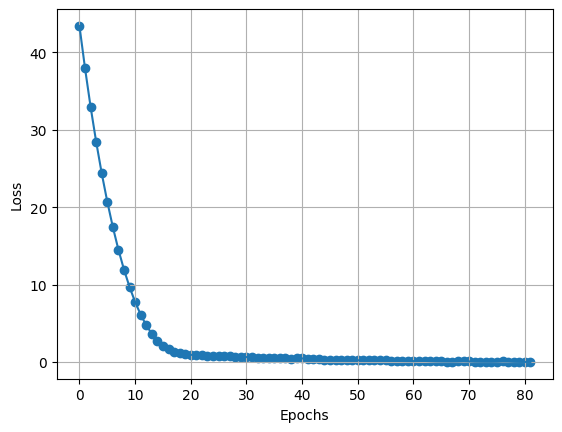

In [149]:
loss_epochs(no_of_iterations , iteration_loss)

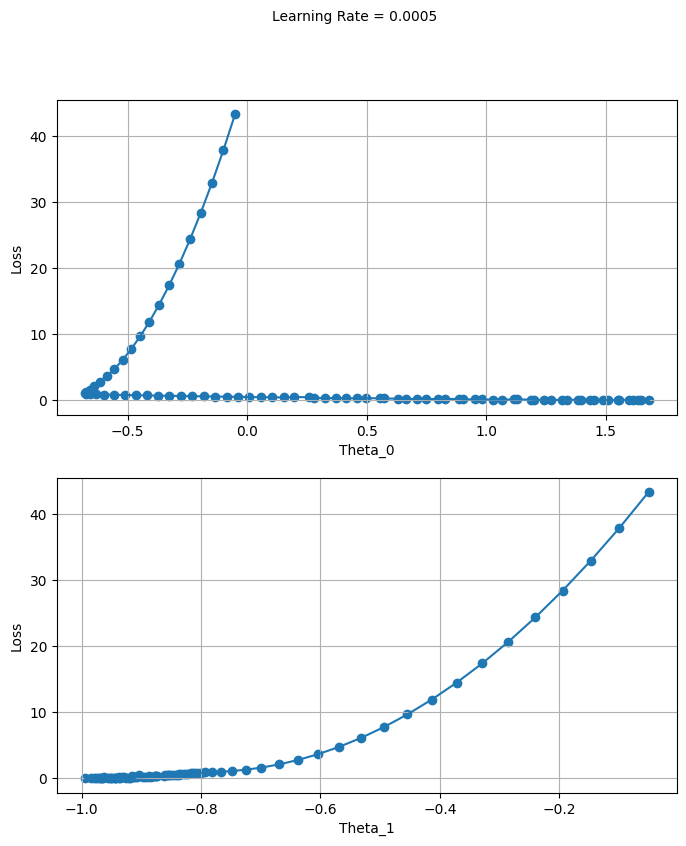

In [150]:
theta_loss(theta_0_lst , theta_1_lst , iteration_loss)

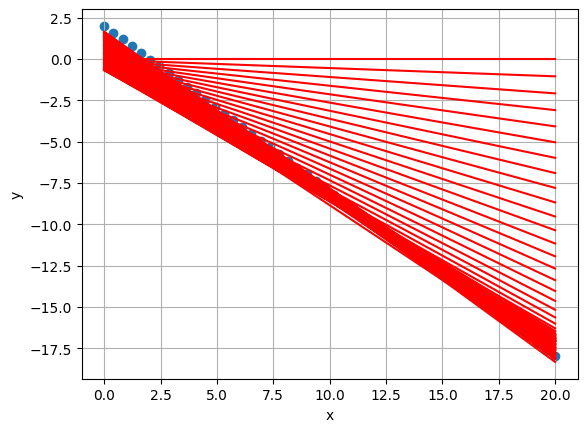

In [151]:
regression_lines(X , y , hypothesis_out)

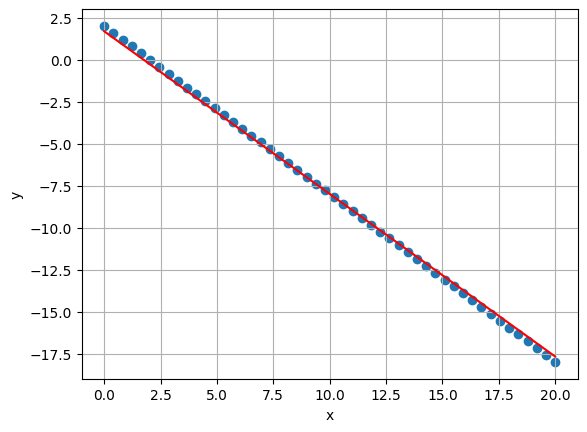

In [152]:
best_regression_lines(X,y,y_pred)

##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.

In [153]:
theta_0_lst , theta_1_lst , iteration_loss , hypothesis_out , theta_0 , theta_1 , no_of_iterations = adam_GD_single_var(X , y , 0.005 , 0.5 , 0.8 ,1e-08 , 500)

Streaming output truncated to the last 5000 lines.
 -13.99602715 -14.35756328 -14.71909942 -15.08063556 -15.44217169
 -15.80370783 -16.16524397 -16.5267801  -16.88831624 -17.24985237]

Error Vector :  [-1.53458169 -1.48795456 -1.44132744 -1.39470031 -1.34807318 -1.30144605
 -1.25481892 -1.20819179 -1.16156466 -1.11493753 -1.0683104  -1.02168327
 -0.97505615 -0.92842902 -0.88180189 -0.83517476 -0.78854763 -0.7419205
 -0.69529337 -0.64866624 -0.60203911 -0.55541199 -0.50878486 -0.46215773
 -0.4155306  -0.36890347 -0.32227634 -0.27564921 -0.22902208 -0.18239495
 -0.13576782 -0.0891407  -0.04251357  0.00411356  0.05074069  0.09736782
  0.14399495  0.19062208  0.23724921  0.28387634  0.33050347  0.37713059
  0.42375772  0.47038485  0.51701198  0.56363911  0.61026624  0.65689337
  0.7035205   0.75014763]

j =  0.3032941339438911


Gradiant Vector  =  [[-0.39221703]
 [ 0.04113562]]

Gradiant Vector Norm =  0.39436828102736665

v_0 =  0.15982796363975402
v_1 =  0.012998370462026466

v_c_0 =  0

In [154]:
y_pred = theta_0 + theta_1 * X

In [155]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  0.9927025718282811


In [156]:
no_of_iterations = np.arange(no_of_iterations)

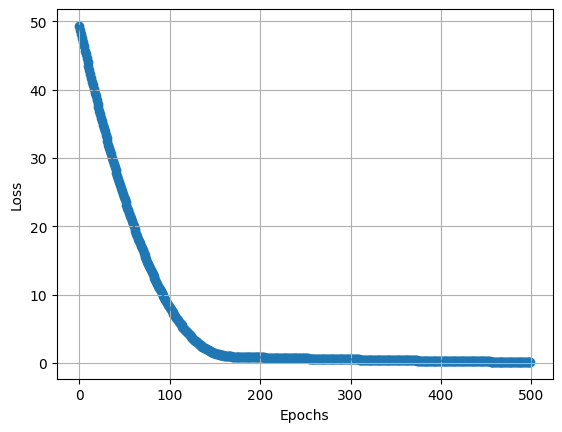

In [157]:
loss_epochs(no_of_iterations , iteration_loss)

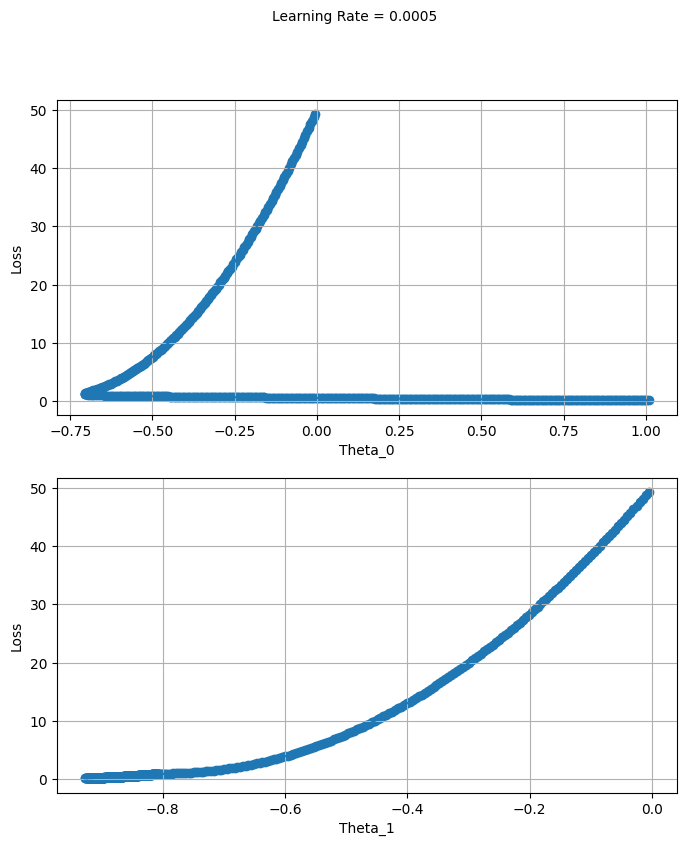

In [158]:
theta_loss(theta_0_lst , theta_1_lst , iteration_loss)

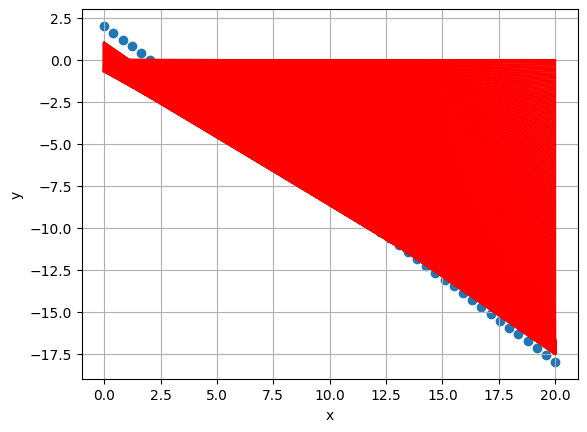

In [159]:
regression_lines(X , y , hypothesis_out)

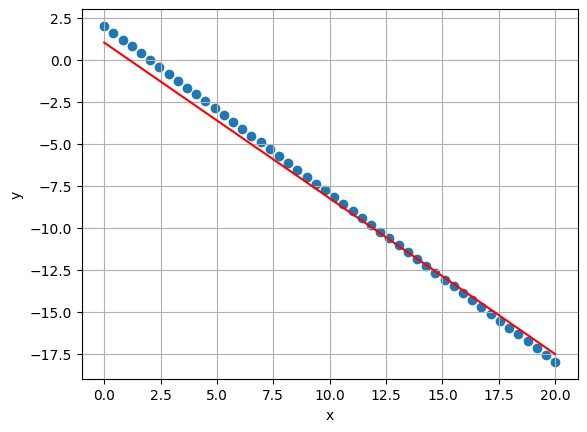

In [160]:
best_regression_lines(X,y,y_pred)

##### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 5000.

In [161]:
theta_0_lst , theta_1_lst , iteration_loss , hypothesis_out , theta_0 , theta_1 , no_of_iterations = adam_GD_single_var(X , y , 0.0005 , 0.8 , 0.8 ,1e-08 , 5000)

Streaming output truncated to the last 5000 lines.
 -14.26669394 -14.56769821 -14.86870249 -15.16970676 -15.47071103]

Error Vector :  [-2.72150163 -2.61434263 -2.50718364 -2.40002465 -2.29286566 -2.18570667
 -2.07854768 -1.97138868 -1.86422969 -1.7570707  -1.64991171 -1.54275272
 -1.43559373 -1.32843473 -1.22127574 -1.11411675 -1.00695776 -0.89979877
 -0.79263978 -0.68548078 -0.57832179 -0.4711628  -0.36400381 -0.25684482
 -0.14968583 -0.04252683  0.06463216  0.17179115  0.27895014  0.38610913
  0.49326812  0.60042712  0.70758611  0.8147451   0.92190409  1.02906308
  1.13622207  1.24338107  1.35054006  1.45769905  1.56485804  1.67201703
  1.77917603  1.88633502  1.99349401  2.100653    2.20781199  2.31497098
  2.42212998  2.52928897]

j =  1.2002907423246434


Gradiant Vector  =  [[-0.09610633]
 [ 8.147451  ]]

Gradiant Vector Norm =  8.148017808910742

v_0 =  0.006496016182359395
v_1 =  70.63358886768407

v_c_0 =  0.006496016182359395
v_c_1 =  70.63358886768407

m_0 =  -0.07783724310

In [162]:
y_pred = theta_0 + theta_1 * X

In [163]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  0.9467806664066584


In [164]:
no_of_iterations = np.arange(no_of_iterations)

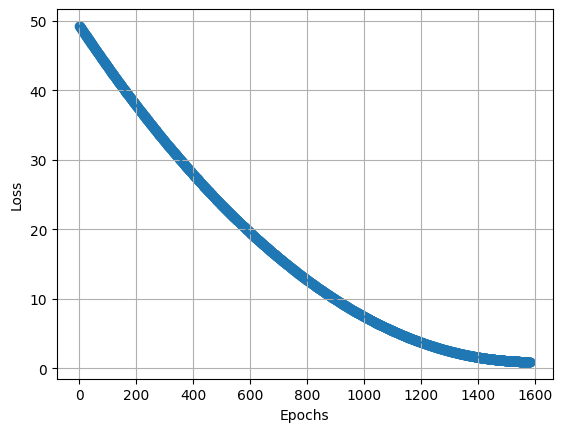

In [165]:
loss_epochs(no_of_iterations , iteration_loss)

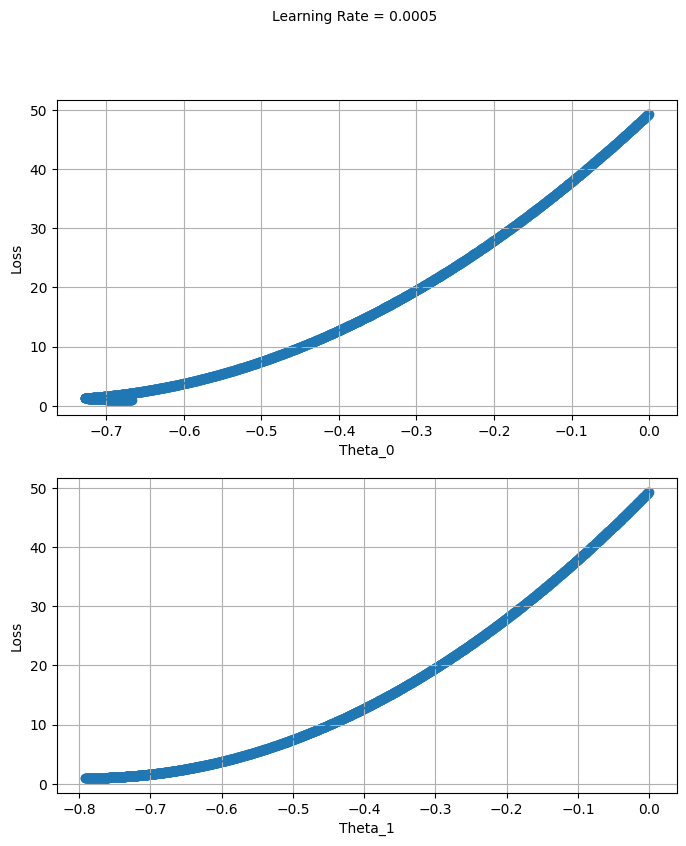

In [166]:
theta_loss(theta_0_lst , theta_1_lst , iteration_loss)

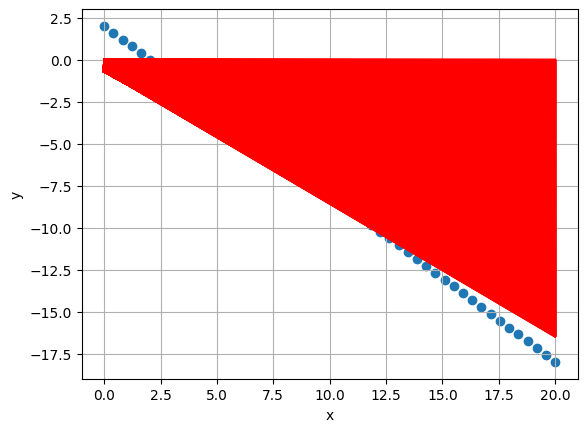

In [167]:
regression_lines(X , y , hypothesis_out)

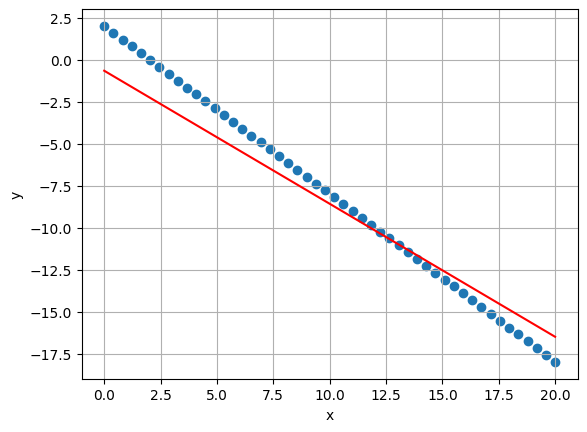

In [168]:
best_regression_lines(X,y,y_pred)

### Play with the parameters and see the results

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [169]:
theta_0_lst , theta_1_lst , iteration_loss , hypothesis_out , theta_0 , theta_1 , no_of_iterations = adam_GD_single_var(X , y , 0.001 , 0.9 , 0.99 ,1e-08 , 5000)

Streaming output truncated to the last 5000 lines.
 -14.50616926 -14.81375313 -15.121337   -15.42892087 -15.73650474]

Error Vector :  [-2.66489511 -2.56431572 -2.46373632 -2.36315693 -2.26257753 -2.16199814
 -2.06141874 -1.96083935 -1.86025995 -1.75968056 -1.65910116 -1.55852176
 -1.45794237 -1.35736297 -1.25678358 -1.15620418 -1.05562479 -0.95504539
 -0.854466   -0.7538866  -0.65330721 -0.55272781 -0.45214842 -0.35156902
 -0.25098963 -0.15041023 -0.04983084  0.05074856  0.15132795  0.25190735
  0.35248675  0.45306614  0.55364554  0.65422493  0.75480433  0.85538372
  0.95596312  1.05654251  1.15712191  1.2577013   1.3582807   1.45886009
  1.55943949  1.66001888  1.76059828  1.86117767  1.96175707  2.06233647
  2.16291586  2.26349526]

j =  1.0734910920719458


Gradiant Vector  =  [[-0.20069993]
 [ 6.54224931]]

Gradiant Vector Norm =  6.545327076266214

v_0 =  0.6016390953490155
v_1 =  279.96341509738477

v_c_0 =  0.6016799250653105
v_c_1 =  279.9824145721526

m_0 =  -0.16261602226492

In [170]:
y_pred = theta_0 + theta_1 * X

In [171]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  0.9485667803280174


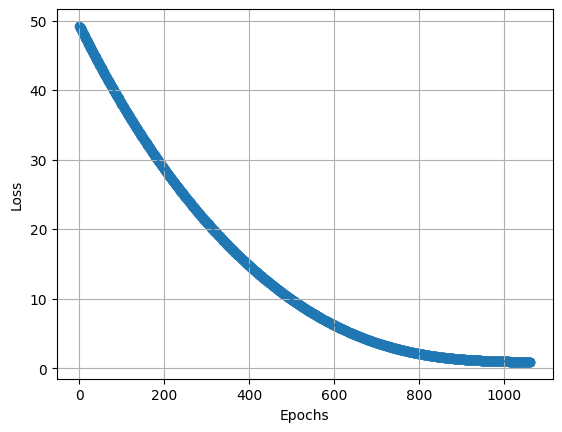

In [174]:
loss_epochs(no_of_iterations , iteration_loss)

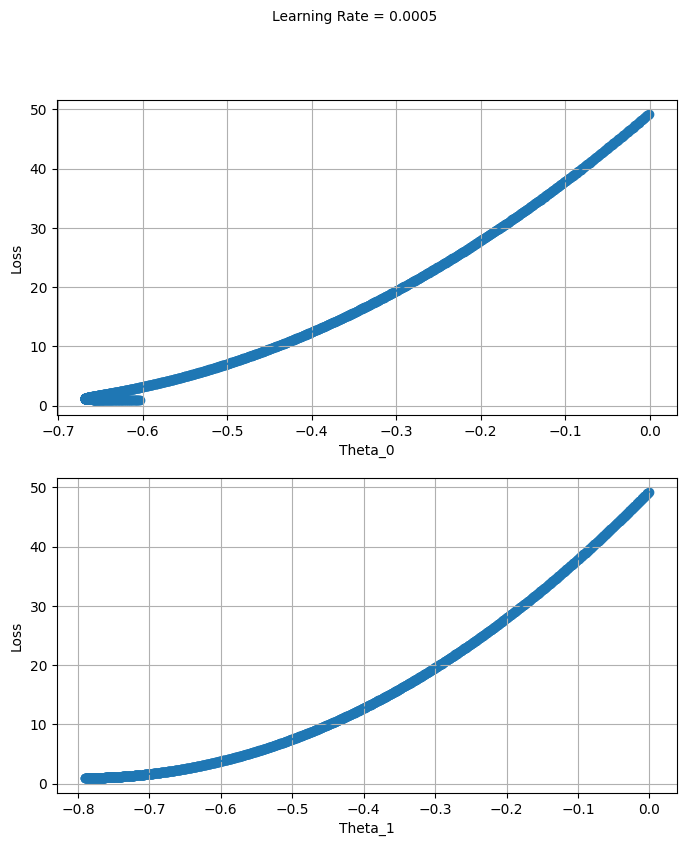

In [175]:
theta_loss(theta_0_lst , theta_1_lst , iteration_loss)

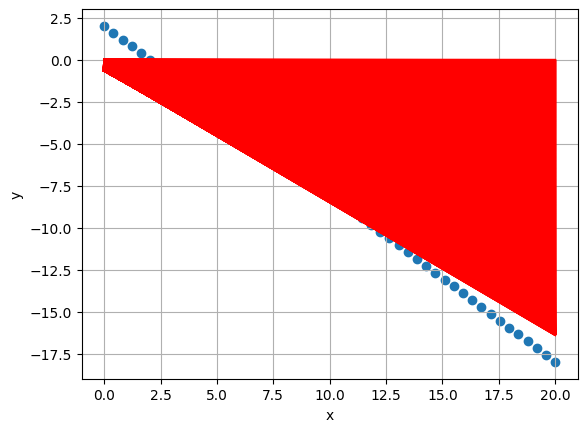

In [176]:
regression_lines(X , y , hypothesis_out)

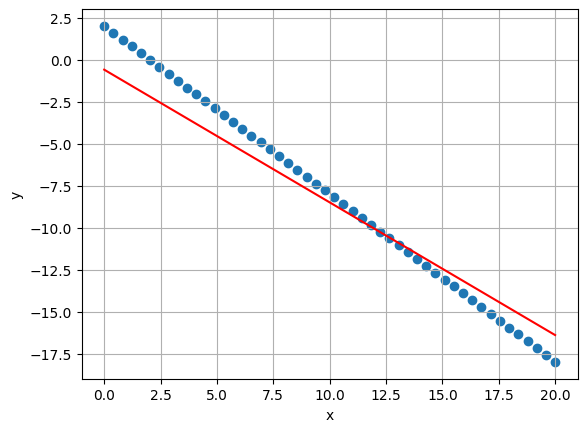

In [177]:
best_regression_lines(X,y,y_pred)

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [178]:
theta_0_lst , theta_1_lst , iteration_loss , hypothesis_out , theta_0 , theta_1 , no_of_iterations = adam_GD_single_var(X , y , 0.001 , 0.9 , 0.5 ,1e-08 , 5000)

Streaming output truncated to the last 5000 lines.
 -1.84705917 -1.71003602 -1.57301286 -1.4359897  -1.29896655 -1.16194339
 -1.02492023 -0.88789708 -0.75087392 -0.61385076 -0.47682761 -0.33980445
 -0.20278129 -0.06575814  0.07126502  0.20828818  0.34531134  0.48233449
  0.61935765  0.75638081  0.89340396  1.03042712  1.16745028  1.30447343
  1.44149659  1.57851975  1.7155429   1.85256606  1.98958922  2.12661238
  2.26363553  2.40065869  2.53768185  2.674705    2.81172816  2.94875132
  3.08577447  3.22279763  3.35982079  3.49684394  3.6338671   3.77089026
  3.90791341  4.04493657]

j =  2.1915648899407816


Gradiant Vector  =  [[ 0.68786923]
 [18.52566061]]

Gradiant Vector Norm =  18.53842671991549

v_0 =  0.4897813133174547
v_1 =  349.0039001215384

v_c_0 =  0.4897813133174547
v_c_1 =  349.0039001215384

m_0 =  0.7933894783001658
m_1 =  19.912114265871594

m_c_0 =  0.7933894783001658
m_c_1 =  19.912114265871594
theta_0_new :  -0.6703317824703183

theta_1_new :  -0.6653591307072029
--

In [179]:
y_pred = theta_0 + theta_1 * X

In [180]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  0.944245878919177


In [181]:
no_of_iterations = np.arange(no_of_iterations)

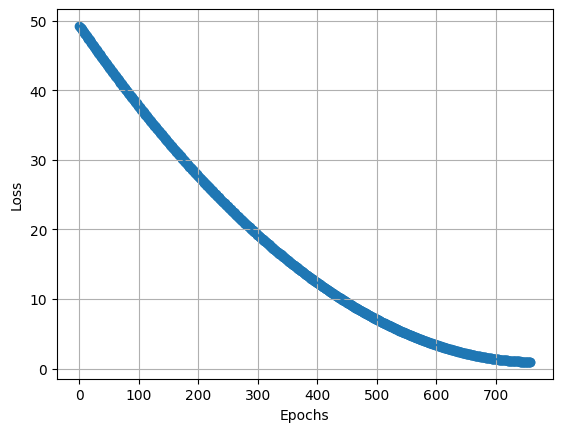

In [182]:
loss_epochs(no_of_iterations , iteration_loss)

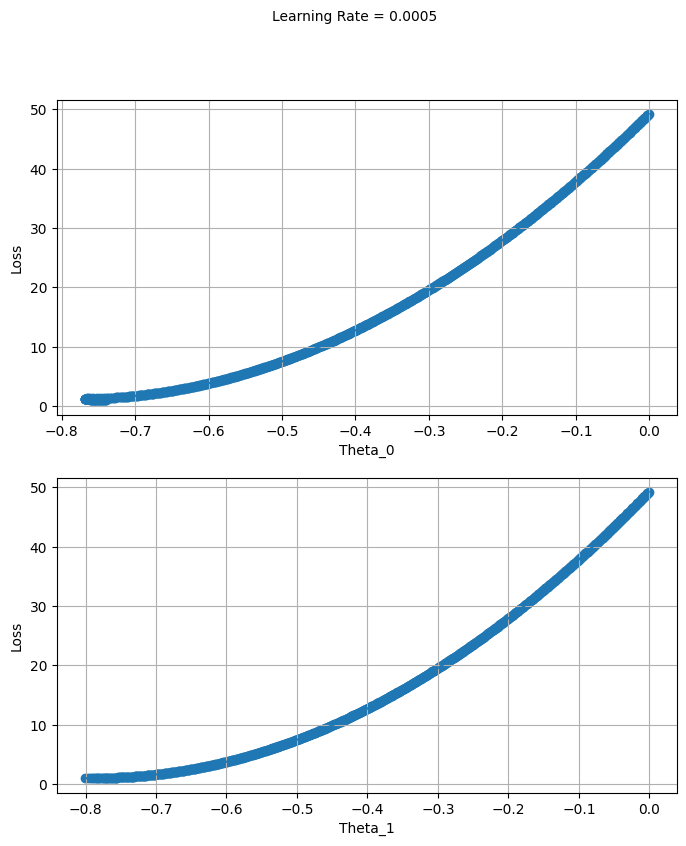

In [183]:
theta_loss(theta_0_lst , theta_1_lst , iteration_loss)

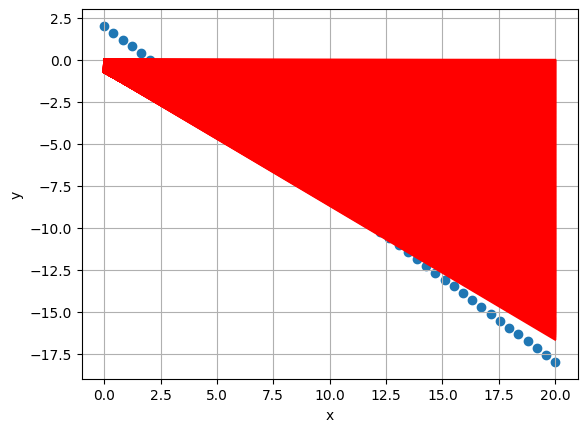

In [184]:
regression_lines(X , y , hypothesis_out)

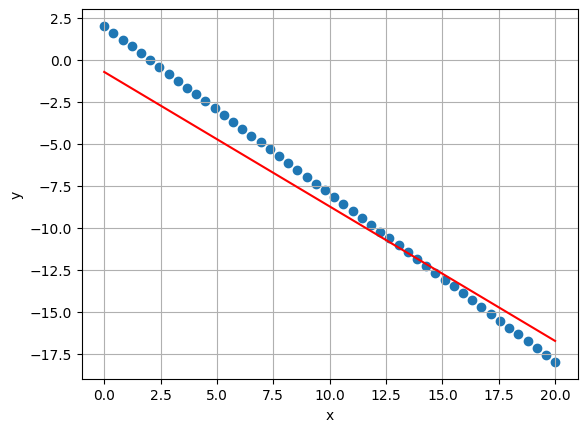

In [185]:
best_regression_lines(X,y,y_pred)

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [186]:
theta_0_lst , theta_1_lst , iteration_loss , hypothesis_out , theta_0 , theta_1 , no_of_iterations = adam_GD_single_var(X , y , 0.001 , 0.5 , 0.99 ,1e-08 , 5000)

Streaming output truncated to the last 5000 lines.
  -8.3828944   -8.69201251  -9.00113063  -9.31024875  -9.61936687
  -9.92848499 -10.23760311 -10.54672123 -10.85583934 -11.16495746
 -11.47407558 -11.7831937  -12.09231182 -12.40142994 -12.71054806
 -13.01966617 -13.32878429 -13.63790241 -13.94702053 -14.25613865
 -14.56525677 -14.87437488 -15.183493   -15.49261112 -15.80172924]

Error Vector :  [-2.65494143 -2.55589629 -2.45685114 -2.35780599 -2.25876085 -2.1597157
 -2.06067055 -1.96162541 -1.86258026 -1.76353511 -1.66448997 -1.56544482
 -1.46639967 -1.36735453 -1.26830938 -1.16926423 -1.07021909 -0.97117394
 -0.87212879 -0.77308364 -0.6740385  -0.57499335 -0.4759482  -0.37690306
 -0.27785791 -0.17881276 -0.07976762  0.01927753  0.11832268  0.21736782
  0.31641297  0.41545812  0.51450326  0.61354841  0.71259356  0.8116387
  0.91068385  1.009729    1.10877415  1.20781929  1.30686444  1.40590959
  1.50495473  1.60399988  1.70304503  1.80209017  1.90113532  2.00018047
  2.09922561  2.198

In [187]:
y_pred = theta_0 + theta_1 * X

In [188]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  0.949344733641701


In [189]:
no_of_iterations = np.arange(no_of_iterations)

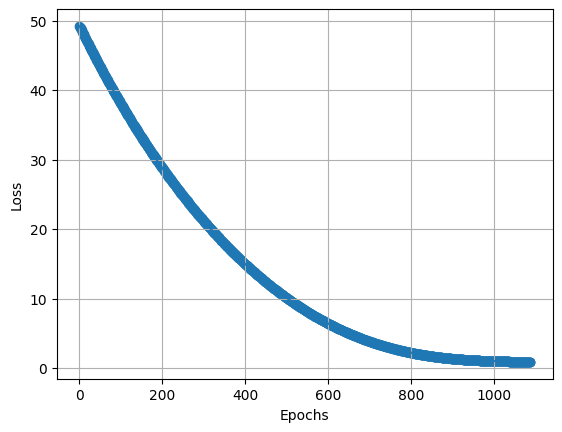

In [190]:
loss_epochs(no_of_iterations , iteration_loss)

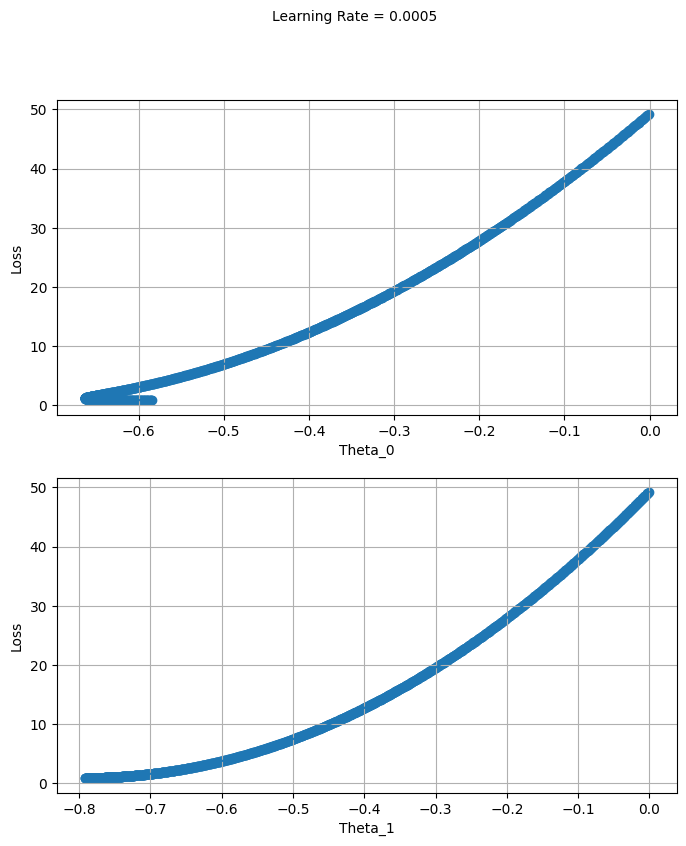

In [191]:
theta_loss(theta_0_lst , theta_1_lst , iteration_loss)

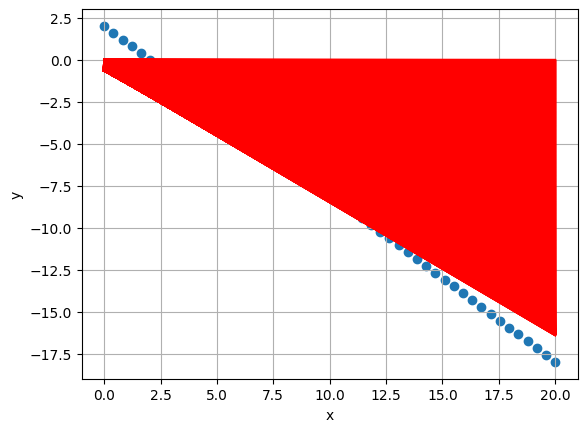

In [192]:
regression_lines(X , y , hypothesis_out)

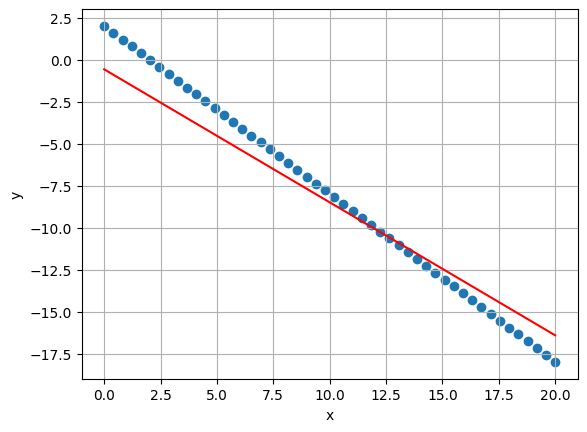

In [193]:
best_regression_lines(X,y,y_pred)

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [194]:
theta_0_lst , theta_1_lst , iteration_loss , hypothesis_out , theta_0 , theta_1 , no_of_iterations = adam_GD_single_var(X , y , 0.001 , 0.5 , 0.5 ,1e-08 , 5000)

Streaming output truncated to the last 5000 lines.
  -7.75311175  -8.03555726  -8.31800276  -8.60044826  -8.88289376
  -9.16533926  -9.44778477  -9.73023027 -10.01267577 -10.29512127
 -10.57756677 -10.86001228 -11.14245778 -11.42490328 -11.70734878
 -11.98979428 -12.27223979 -12.55468529 -12.83713079 -13.11957629
 -13.40202179 -13.6844673  -13.9669128  -14.2493583  -14.5318038 ]

Error Vector :  [-2.6919742  -2.56625644 -2.44053868 -2.31482091 -2.18910315 -2.06338539
 -1.93766762 -1.81194986 -1.6862321  -1.56051433 -1.43479657 -1.30907881
 -1.18336104 -1.05764328 -0.93192552 -0.80620775 -0.68048999 -0.55477223
 -0.42905446 -0.3033367  -0.17761894 -0.05190117  0.07381659  0.19953435
  0.32525212  0.45096988  0.57668764  0.7024054   0.82812317  0.95384093
  1.07955869  1.20527646  1.33099422  1.45671198  1.58242975  1.70814751
  1.83386527  1.95958304  2.0853008   2.21101856  2.33673633  2.46245409
  2.58817185  2.71388962  2.83960738  2.96532514  3.09104291  3.21676067
  3.34247843  3.4

In [195]:
y_pred = theta_0 + theta_1 * X

In [196]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  0.9475845101116701


In [197]:
no_of_iterations = np.arange(no_of_iterations)

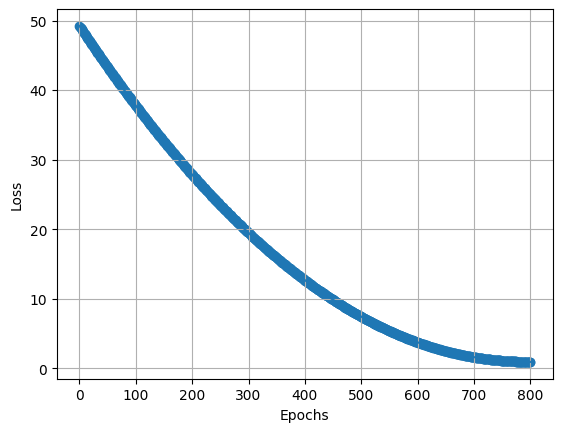

In [198]:
loss_epochs(no_of_iterations , iteration_loss)

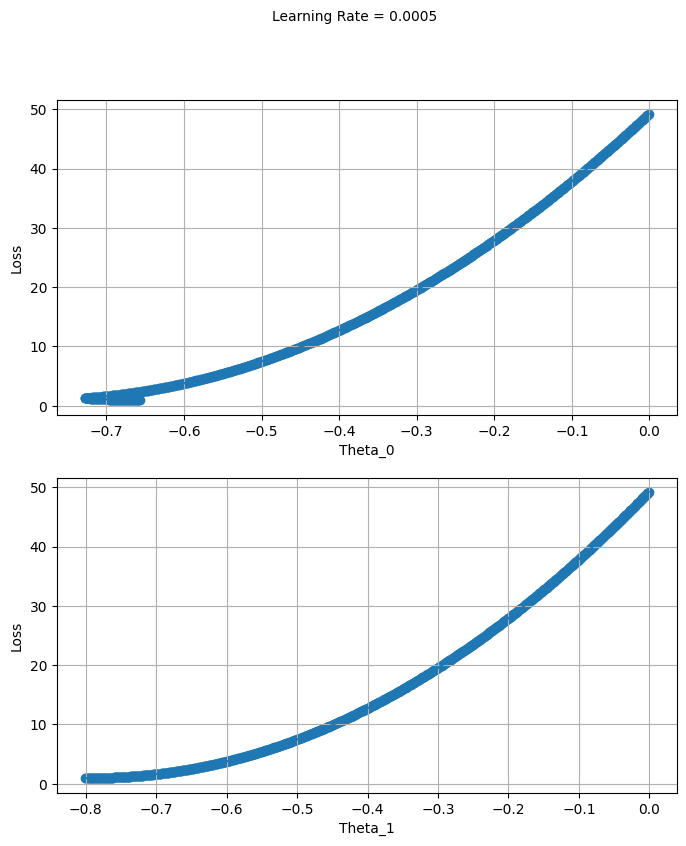

In [199]:
theta_loss(theta_0_lst , theta_1_lst , iteration_loss)

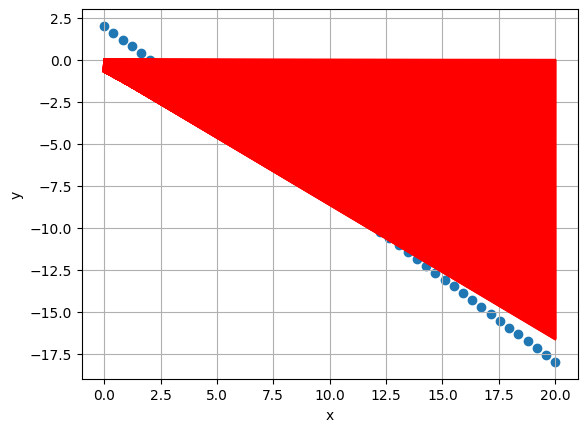

In [200]:
regression_lines(X , y , hypothesis_out)

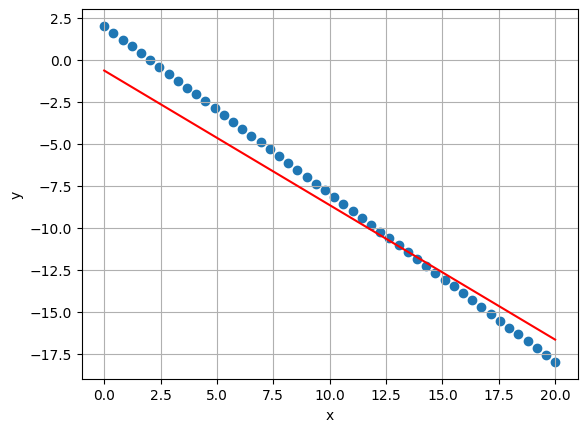

In [201]:
best_regression_lines(X,y,y_pred)

##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [202]:
theta_0_lst , theta_1_lst , iteration_loss , hypothesis_out , theta_0 , theta_1 , no_of_iterations = adam_GD_single_var(X , y , 0.01 , 0.9 , 0.99 ,1e-08 , 5000)

Streaming output truncated to the last 5000 lines.

Gradiant Vector  =  [[-0.32873746]
 [ 0.28444795]]

Gradiant Vector Norm =  0.4347170964128224

v_0 =  0.4076229540991667
v_1 =  53.78873001841535

v_c_0 =  0.41192021230878983
v_c_1 =  54.35578361373522

m_0 =  -0.3399816021062689
m_1 =  0.29803767662126435

m_c_0 =  -0.3399816021062689
m_c_1 =  0.29803767662126435
theta_0_new :  0.6470344549821271

theta_1_new :  -0.897451716621294
------------------------- Iteration  454 -------------------------

h(x) :  [  0.64703445   0.28072763  -0.08557919  -0.45188601  -0.81819284
  -1.18449966  -1.55080648  -1.91711331  -2.28342013  -2.64972695
  -3.01603378  -3.3823406   -3.74864742  -4.11495425  -4.48126107
  -4.84756789  -5.21387471  -5.58018154  -5.94648836  -6.31279518
  -6.67910201  -7.04540883  -7.41171565  -7.77802248  -8.1443293
  -8.51063612  -8.87694295  -9.24324977  -9.60955659  -9.97586342
 -10.34217024 -10.70847706 -11.07478388 -11.44109071 -11.80739753
 -12.17370435 -12.540011

In [203]:
y_pred = theta_0 + theta_1 * X

In [204]:
print("r2_score : " ,r2_score(y , y_pred))

r2_score :  0.9952892444628807


In [205]:
no_of_iterations = np.arange(no_of_iterations)

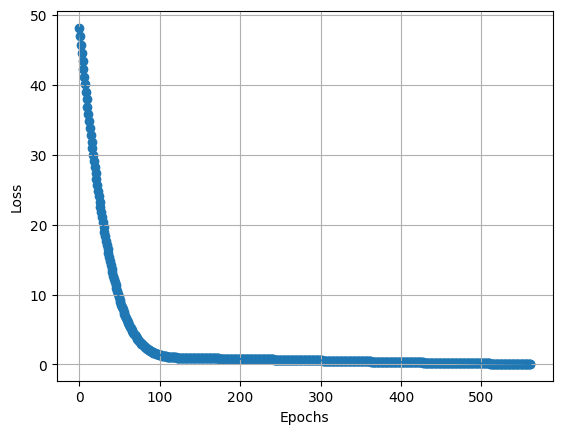

In [206]:
loss_epochs(no_of_iterations , iteration_loss)

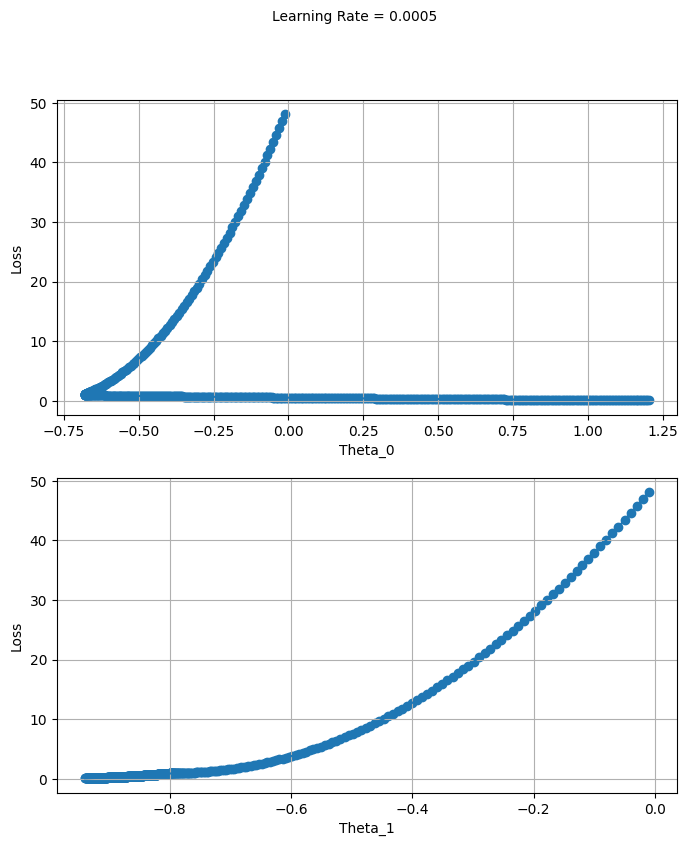

In [207]:
theta_loss(theta_0_lst , theta_1_lst , iteration_loss)

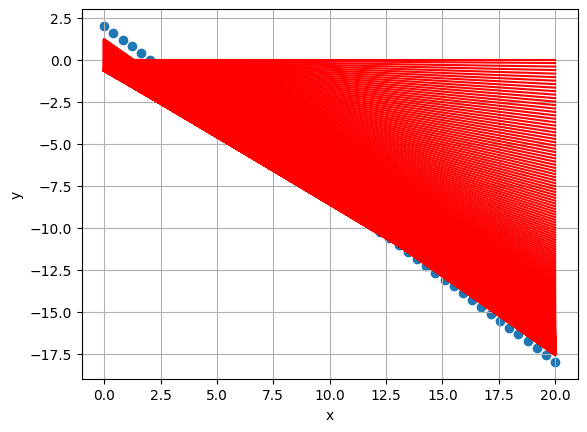

In [208]:
regression_lines(X , y , hypothesis_out)

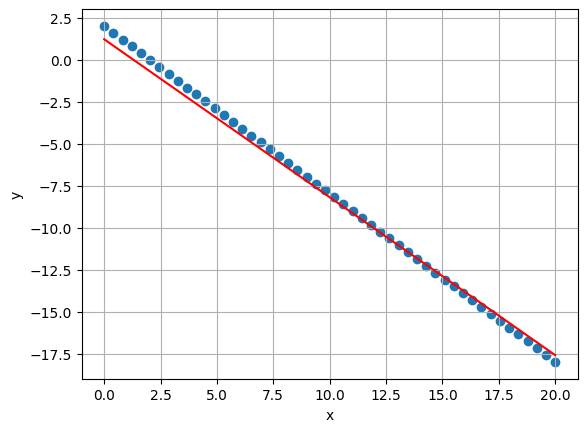

In [209]:
best_regression_lines(X,y,y_pred)

## Congratulations
![image.png](attachment:image.png)